# Unit 5 - Financial Planning

In [38]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [39]:
# Load .env enviroment variables
load_dotenv('api.env')

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [40]:
# Set current amount of crypto assets
btc_hodl = 1.2
eth_hodl = 5.3

In [41]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [59]:
# Fetch current BTC price
my_btc = requests.get(btc_url).json()
my_btc_price = my_btc['data']['1']['quotes']['USD']['price']
# print(my_btc_price)

# Fetch current ETH price
my_eth = requests.get(eth_url).json()
my_eth_price = my_eth['data']['1027']['quotes']['USD']['price']
# print(my_eth_price)

# Compute current value of my crpto
my_btc_value = my_btc_price * btc_hodl
my_eth_value = my_eth_price * eth_hodl
my_crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {btc_hodl} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth_hodl} ETH is ${my_eth_value:0.2f}")
print(my_crypto_value)

The current value of your 1.2 BTC is $36324.00
The current value of your 5.3 ETH is $10223.86
46547.859


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [43]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [44]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")



In [54]:
# Format current date as ISO format
start = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_closing = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
# df_closing.head(10)

# Display first 10 rows of AGG and SPY side by side
df_agg = df_closing[df_closing['symbol'] == "AGG"].head()
df_spy = df_closing[df_closing['symbol'] == "SPY"].head()

# Concatenate the DataFrames side by side
df_combined = pd.concat([df_agg, df_spy], axis=1)

# Display the combined DataFrame
df_combined.head()


open    high      low   close   volume  \
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                           trade_count        vwap symbol    open    high  \
timestamp                                                                   
2020-08-07 04:00:00+00:00        15246  119.475306    AGG  333.28  334.88   

                             low   close    volume  trade_count        vwap  \
timestamp                                                                     
2020-08-07 04:00:00+00:00  332.3  334.57  57282821       350100  333.800372   

                          symbol  
timestamp                         
2020-08-07 04:00:00+00:00    SPY

In [56]:
# Pick AGG and SPY close prices

agg_close_price = df_closing[df_closing['symbol'] == "AGG"]['close'].head(10)
spy_close_price = df_closing[df_closing['symbol'] == "SPY"]['close'].head(10)
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2020-08-07 04:00:00+00:00    119.43
Name: close, dtype: float64
Current SPY closing price: $timestamp
2020-08-07 04:00:00+00:00    334.57
Name: close, dtype: float64


In [60]:
# Compute the current value of shares
agg_shares_value = df_agg * my_agg
spy_shares_value = df_spy * my_spy

# print(spy_shares_value)
# print(agg_shares_value)

# Access the first value from each Series
agg_shares_value = agg_shares_value.iloc[0]
spy_shares_value = spy_shares_value.iloc[0]

total_shares_value = agg_shares_value + spy_shares_value
print(total_shares_value)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_shares_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_shares_value:0.2f}")

40614.5
The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [63]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [my_crypto_value, total_shares_value] 

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, index=['my_crypto_value', 'total_shares_value'], columns=['Value'])


# Display savings DataFrame
display(savings_df)

Value
my_crypto_value     46547.859
total_shares_value  40614.500

In [68]:
# Plot savings pie chart
savings_df.plot(kind='pie', y='Value', legend=False, figsize=(8, 8))

<Axes: ylabel='Value'>

In [197]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings
total_savings = my_crypto_value + total_shares_value
print(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats! You have enough ${total_savings} in your fund!")
elif total_savings == emergency_fund:
    print(f"Congrats! You have reached your goal!")
else:
    print(f"You are ${total_savings - emergency_fund} from your goal!")

36000
87162.359
Congrats! You have enough $87162.359 in your fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [214]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [226]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_closing_five = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# print(df_closing_five)

# Reorganize the DataFrame

# Separate ticker data
df_agg_five = df_closing_five[df_closing_five['symbol'] == "AGG"].drop('symbol', axis=1)
df_spy_five = df_closing_five[df_closing_five['symbol'] == "SPY"].drop('symbol', axis=1)


# Concatenate the DataFrames side by side
df_combined_five = pd.concat([df_spy_five, df_agg_five], axis=1, keys=['AAG', 'SPY']).head()

# Display the combined DataFrame


In [227]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

mc_simulation = MCSimulation(
    portfolio_data = df_combined_five,
    weights = [0.60, 0.40],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)


In [228]:
# Printing the simulation input data
print(mc_simulation)

In [229]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
import warnings

warnings.filterwarnings('ignore')

mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0             1             2             3             4    \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.001334e+00  9.988390e-01  1.001187e+00  9.997128e-01  1.005953e+00   
2     9.988976e-01  1.003694e+00  9.947132e-01  1.000602e+00  1.006398e+00   
3     9.941058e-01  1.004722e+00  9.891398e-01  1.000890e+00  1.016023e+00   
4     1.001859e+00  1.009237e+00  9.847898e-01  1.008447e+00  1.027967e+00   
...            ...           ...           ...           ...           ...   
7556  6.793980e+07  1.705305e+08  7.530100e+07  1.675040e+08  7.827075e+07   
7557  6.811142e+07  1.706065e+08  7.548978e+07  1.664883e+08  7.821113e+07   
7558  6.840326e+07  1.693824e+08  7.639390e+07  1.665905e+08  7.928871e+07   
7559  6.859198e+07  1.696320e+08  7.671192e+07  1.675757e+08  7.997369e+07   
7560  6.852658e+07  1.682970e+08  7.689242e+07  1.680296e+08  8.031274e+07   

               5             6             7             8             9    \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.002623e+00  1.007623e+00  1.001644e+00  1.002805e+00  1.001917e+00   
2     1.012255e+00  1.011725e+00  1.003798e+00  9.986843e-01  1.005114e+00   
3     1.005527e+00  1.013449e+00  1.013946e+00  1.006408e+00  1.010768e+00   
4     1.005291e+00  1.018009e+00  1.011485e+00  1.004513e+00  1.004759e+00   
...            ...           ...           ...           ...           ...   
7556  3.610748e+08  1.646252e+08  1.247107e+08  1.273792e+08  1.006754e+08   
7557  3.630944e+08  1.649855e+08  1.245857e+08  1.280389e+08  1.009002e+08   
7558  3.662738e+08  1.663058e+08  1.247482e+08  1.284454e+08  1.001656e+08   
7559  3.686755e+08  1.678820e+08  1.244887e+08  1.289960e+08  1.008676e+08   
7560  3.720924e+08  1.678814e+08  1.252130e+08  1.294228e+08  1.012011e+08   

      ...           490           491           492           493  \
0     ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     ...  1.007872e+00  1.016354e+00  1.004883e+00  1.007124e+00   
2     ...  1.012304e+00  1.022715e+00  1.011699e+00  1.013835e+00   
3     ...  1.014485e+00  1.026560e+00  1.012053e+00  1.017558e+00   
4     ...  1.025658e+00  1.020679e+00  1.015404e+00  1.021386e+00   
...   ...           ...           ...           ...           ...   
7556  ...  1.416629e+08  1.191222e+08  2.809703e+08  5.937668e+07   
7557  ...  1.421327e+08  1.197803e+08  2.812020e+08  5.983745e+07   
7558  ...  1.418947e+08  1.199444e+08  2.845915e+08  6.023243e+07   
7559  ...  1.423463e+08  1.200397e+08  2.854760e+08  6.017001e+07   
7560  ...  1.421377e+08  1.197869e+08  2.855755e+08  6.041001e+07   

               494           495           496           497           498  \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.004586e+00  1.005473e+00  1.003231e+00  1.014281e+00  9.961420e-01   
2     1.005768e+00  1.014376e+00  9.978656e-01  1.012860e+00  9.960553e-01   
3     1.003882e+00  1.027609e+00  9.954357e-01  1.016906e+00  9.978333e-01   
4     1.001096e+00  1.033197e+00  9.985599e-01  1.015887e+00  9.972356e-01   
...            ...           ...           ...           ...           ...   
7556  2.322136e+08  1.990887e+08  9.479800e+07  1.223854e+08  1.632857e+08   
7557  2.310019e+08  2.005506e+08  9.581206e+07  1.232169e+08  1.642004e+08   
7558  2.312591e+08  1.997269e+08  9.535665e+07  1.233077e+08  1.643130e+08   
7559  2.330655e+08  1.996794e+08  9.506769e+07  1.233609e+08  1.654313e+08   
7560  2.340002e+08  2.007236e+08  9.475408e+07  1.247861e+08  1.669053e+08   

               499  
0     1.000000e+00  
1     9.958262e-01  
2     1.001229e+00  
3     1.000133e+00  
4     1.006799e+00  
...            ...  
7556  1.717408e+08  
7557  1.724279e+08  
7558  1.731842e+08  
7559  1.733959e+08  
7560  1.740919e+08  

[7561 rows x 500 columns]

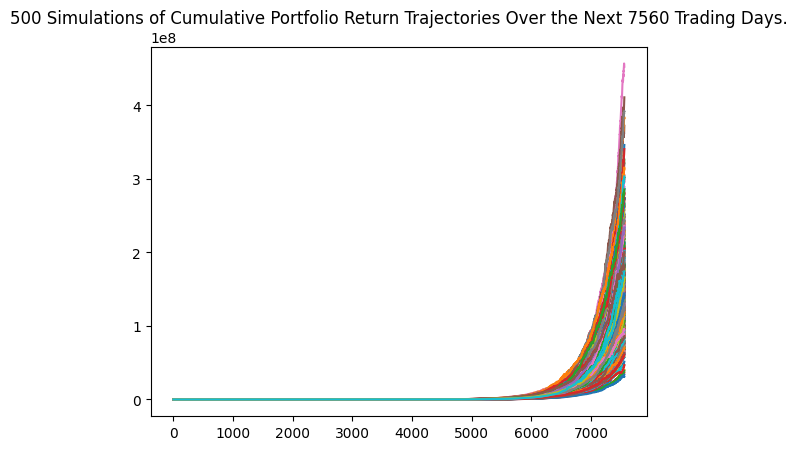

In [230]:
# Plot simulation outcomes
line_plot = mc_simulation.plot_simulation()




In [231]:
# Plot probability distribution and confidence intervals
dist_plot = mc_simulation.plot_distribution()

### Retirement Analysis

In [211]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_data = {
    "mean": list(mc_simulation.simulated_return.mean(axis=1)),
    "median": list(mc_simulation.simulated_return.median(axis=1)),
    "min": list(mc_simulation.simulated_return.min(axis=1)),
    "max": list(mc_simulation.simulated_return.max(axis=1))
}

sum_stat = mc_simulation.summarize_cumulative_return()

# Print summary statistics
print(sum_stat)

count             500.000000
mean            13146.246821
std              6385.482426
min              2880.690128
25%              8617.265055
50%             11575.434741
75%             16478.285522
max             45889.160967
95% CI Lower     4581.026078
95% CI Upper    27447.822970
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [213]:
# Set initial investment
initial_investment = 20000

tbl = mc_simulation.summarize_cumulative_return()

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45810260.78 and $274478229.7


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")